*EDA*

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [47]:
df = pd.read_csv("esseaqi.csv")

In [116]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,15246,15247,15248,15249,15250,15251,15252,15253,15254,15255
id,2472650173,2510654835,2511557601,2522220295,2516069997,2514753785,2492392118,2516584682,2515567739,2485030080,...,2512290389,2518873917,2520837438,2509043980,2498443199,2517456409,2512290679,2475025733,2519981464,2514394292
url,https://www.vivareal.com.br/imovel/apartamento...,https://www.vivareal.com.br/imovel/apartamento...,https://www.vivareal.com.br/imovel/apartamento...,https://www.vivareal.com.br/imovel/apartamento...,https://www.vivareal.com.br/imovel/apartamento...,https://www.vivareal.com.br/imovel/apartamento...,https://www.vivareal.com.br/imovel/apartamento...,https://www.vivareal.com.br/imovel/apartamento...,https://www.vivareal.com.br/imovel/apartamento...,https://www.vivareal.com.br/imovel/apartamento...,...,https://www.vivareal.com.br/imovel/apartamento...,https://www.vivareal.com.br/imovel/apartamento...,https://www.vivareal.com.br/imovel/apartamento...,https://www.vivareal.com.br/imovel/apartamento...,https://www.vivareal.com.br/imovel/apartamento...,https://www.vivareal.com.br/imovel/apartamento...,https://www.vivareal.com.br/imovel/apartamento...,https://www.vivareal.com.br/imovel/apartamento...,https://www.vivareal.com.br/imovel/apartamento...,https://www.vivareal.com.br/imovel/apartamento...
header,"Apartamento com 2 Quartos à Venda, 64m²","Apartamento com 3 Quartos à Venda, 170m²","Apartamento com 3 Quartos à Venda, 218m²","Apartamento com 3 Quartos à Venda, 116m²","Apartamento com 4 Quartos à Venda, 250m²","Apartamento com 3 Quartos à Venda, 81m²","Apartamento com 4 Quartos à Venda, 225m²","Apartamento com Quarto à Venda, 66m²","Apartamento com Quarto à Venda, 48m²","Apartamento com 3 Quartos à Venda, 197m²",...,"Apartamento com Quarto à Venda, 29m²","Apartamento com 2 Quartos à Venda, 40m²","Apartamento com 2 Quartos à Venda, 42m²","Apartamento com 3 Quartos à Venda, 104m²","Apartamento com Quarto à Venda, 28m²","Apartamento com 2 Quartos à Venda, 49m²","Apartamento com Quarto à Venda, 28m²","Apartamento com 2 Quartos à Venda, 42m²","Apartamento com 3 Quartos à Venda, 122m²","Apartamento com Quarto à Venda, 55m²"
address,"Avenida Portugal, 401 - Brooklin, São Paulo - SP","Rua Pensilvânia, 742 - Brooklin, São Paulo - SP","Rua Laplace, 44 - Brooklin, São Paulo - SP","Rua Arandu, 660 - Brooklin, São Paulo - SP","Rua Flórida, 320 - Brooklin, São Paulo - SP","Rua Pássaros e Flores, 444 - Brooklin, São Pau...","Rua Arizona, 664 - Brooklin, São Paulo - SP","Rua Kansas, 1700 - Brooklin, São Paulo - SP","Rua Doutor Paschoal Imperatriz, 105 - Brooklin...","Rua Nova York, 161 - Brooklin, São Paulo - SP",...,"Tucuruvi, São Paulo - SP","Tucuruvi, São Paulo - SP","Rua Baltazar de Morais - Tucuruvi, São Paulo - SP","Avenida Tucuruvi - Tucuruvi, São Paulo - SP","Rua Baraqueçaba - Tucuruvi, São Paulo - SP","Avenida Mazzei - Tucuruvi, São Paulo - SP","Tucuruvi, São Paulo - SP","Rua Jeruaba - Tucuruvi, São Paulo - SP","Rua Paulo Maldi - Tucuruvi, São Paulo - SP","Avenida Nova Cantareira, 100 - Tucuruvi, São P..."
area,64,170,218,116,250,81,225,66,48,197,...,29,40,42,104,28,49,28,42,122,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
parse_bairro,brooklin,brooklin,brooklin,brooklin,brooklin,brooklin,brooklin,brooklin,brooklin,brooklin,...,tucuruvi,tucuruvi,tucuruvi,tucuruvi,tucuruvi,tucuruvi,tucuruvi,tucuruvi,tucuruvi,tucuruvi
lat,-23.612983,-23.612118,-23.624983,-23.606832,-23.61523,-23.622278,-23.613975,-23.59962,-23.620634,-23.615818,...,-23.473904,-23.473904,-23.47795,-23.477859,-23.480098,-23.473748,-23.473904,-23.472761,-23.483614,-23.488428
lon,-46.67955,-46.685606,-46.685161,-46.690248,-46.683582,-46.689713,-46.688229,-46.689701,-46.695495,-46.685822,...,-46.610817,-46.610817,-46.589681,-46.609736,-46.605477,-46.601172,-46.610817,-46.595993,-46.611336,-46.623384
log_price,13.480038,14.53335,14.739769,14.187074,15.250595,13.586097,15.065412,13.981025,13.428376,14.978661,...,12.003577,12.

In [66]:
df_original = df.copy()

In [67]:
df['price'].describe()

count    1.525600e+04
mean     9.397043e+05
std      2.361303e+06
min      1.700000e+02
25%      3.391500e+05
50%      5.699000e+05
75%      1.029010e+06
max      1.489000e+08
Name: price, dtype: float64

In [68]:
df['price'].mean()

939704.2506554798

In [69]:
df['price'].median()

569900.0

In [70]:
df['price'].quantile([.25,.75])

0.25     339150.00
0.75    1029010.25
Name: price, dtype: float64

In [71]:
df['price'].quantile([.25,.75])

0.25     339150.00
0.75    1029010.25
Name: price, dtype: float64

In [72]:
q1,q3 = df['price'].quantile([.25,.75])
print(f"q1 = {q1}, q3 = {q3}")

q1 = 339150.0, q3 = 1029010.25


In [73]:
iqr = q3-q1
print(iqr)

689860.25


In [74]:
lb =  q1-1.5*iqr
print(lb)

-695640.375


In [75]:
ub = q3+1.5*iqr
print(ub)

2063800.625


<AxesSubplot:>

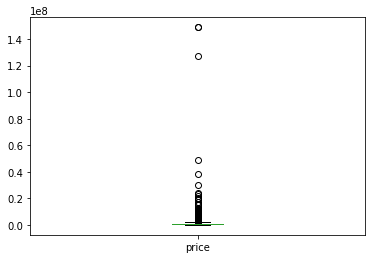

In [76]:
df['price'].plot(kind='box')

<AxesSubplot:>

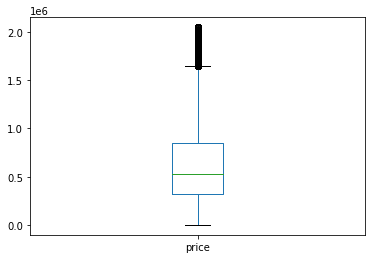

In [77]:
df.loc[df['price'].between(lb,ub),'price'].plot(kind='box')

In [78]:
c = df.loc[df['price'].between(lb,ub)]

,id,url,header,address,area,rooms,bathrooms,garages,price,condo,...,Varanda gourmet,Vigia,Vista para a montanha,Vista para o mar,Área de lazer,Área de serviço,estado,parse_bairro,lat,lon
2,2511557601,https://www.vivareal.com.br/imovel/apartamento...,"Apartamento com 3 Quartos à Venda, 218m²","Rua Laplace, 44 - Brooklin, São Paulo - SP",218,3,5,4,2520000,2800.0,...,1,0,0,0,0,0,SP,brooklin,-23.624983,-46.685161
4,2516069997,https://www.vivareal.com.br/imovel/apartamento...,"Apartamento com 4 Quartos à Venda, 250m²","Rua Flórida, 320 - Brooklin, São Paulo - SP",250,4,6,4,4200000,2500.0,...,1,0,0,0,0,0,SP,brooklin,-23.615230,-46.683582
6,2492392118,https://www.vivareal.com.br/imovel/apartamento...,"Apartamento com 4 Quartos à Venda, 225m²","Rua Arizona, 664 - Brooklin, São Paulo - SP",225,4,6,4,3490000,2253.0,...,0,0,0,0,0,0,SP,brooklin,-23.613975,-46.688229
9,2485030080,https://www.vivareal.com.br/imovel/apartamento...,"Apartamento com 3 Quartos à Venda, 197m²","Rua Nova York, 161 - Brooklin, São Paulo - SP",197,3,4,3,3200000,1450.0,...,0,0,0,0,0,0,SP,brooklin,-23.615818,-46.685822
11,2515685776,https://www.vivareal.com.br/imovel/apartamento...,"Apartamento com 4 Quartos à Venda, 205m²","Rua Arizona, 1064 - Brooklin, São Paulo - SP",205,4,5,4,2600000,2100.0,...,0,0,0,0,0,0,SP,brooklin,-23.611705,-46.691270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14386,2504471724,https://www.vivareal.com.br/imovel/apartamento...,"Apartamento com 4 Quartos à Venda, 350m²","Avenida Nova Cantareira, 3924 - Tucuruvi, São ...",350,4,7,10,4740000,1100.0,...,1,0,0,0,0,0,SP,tucuruvi,-23.466285,-46.615915
14396,2520673876,https://www.vivareal.com.br/imovel/apartamento...,"Apartamento com 3 Quartos à Venda, 382m²","Avenida Nova Cantareira, 3924 - Tucuruvi, São ...",382,3,5,6,3550000,1100.0,...,0,0,0,0,0,1,SP,tucuruvi,-23.466285,-46.615915
14434,2501217492,https://www.vivareal.com.br/imovel/apartamento...,"Apartamento com 3 Quartos à Venda, 375m²","Avenida Nova Cantareira, 3924 - Tucuruvi, São ...",375,3,3,2,2900000,1100.0,...,0,0,0,0,0,0,SP,tucuruvi,-23.466285,-46.615915
14542,2522989817,https://www.vivareal.com.br/imovel/apartamento...,"Apartamento com 2 Quartos à Venda, 60m²",Avenida Professora Virgília Rodrigues Alves de...,60,2,1,1,2800000,453.0,...,0,0,0,0,0,0,SP,tucuruvi,-23.470381,-46.608111


In [80]:
df['log_price'] = np.log(df['price'])

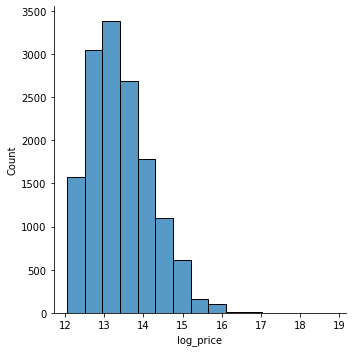

In [88]:
sns.displot(data=df.loc[df['price']>170000], x ='log_price', bins=15)

<AxesSubplot:ylabel='price'>

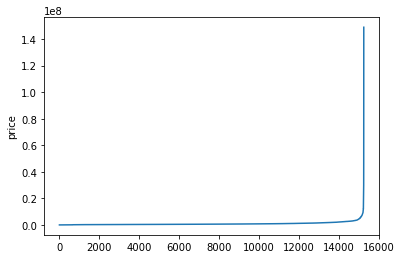

In [103]:
sns.lineplot(data=df.sort_values(by="price"), x=range(len(df)), y="price")

In [130]:
df = pd.read_csv("primary_data.csv")

In [131]:
def remove_outliers(data, bairro, coluna, max_removidos):
    q1, q3 = data.loc[data["bairro"] == bairro, coluna].quantile([.25,.75])
    iqr = q3-q1
    lb = max(q1 - 1.5*iqr, 0)
    ub = q3 + 1.5*iqr
    len_before = sum(~data.loc[data["bairro"] == bairro, coluna].isnull())
    len_after = len(data.loc[(data["bairro"]==bairro) & (data[coluna].between(lb, ub)), coluna])
    removidos = 1-(len_after/len_before)
    print(f"{bairro}: remocao por iqr seria {removidos*100}%")
    if removidos < max_removidos:
        print(f"Lower bound: {lb}, upper bound: {ub}")
        print(f"Removidos por iqr: {removidos*100}%")
        data.loc[(data["bairro"]==bairro) & (~data[coluna].between(lb, ub)), coluna] = np.nan
    else:
        data = remove_outliers_percentis(data, bairro, coluna, lower_percentile=0, upper_percentile=(1-max_removidos))
    return data

In [132]:
def remove_outliers_percentis(data, bairro, coluna, lower_percentile=0.0, upper_percentile=.99):
    lb, ub = data.loc[data["bairro"]==bairro, coluna].quantile([lower_percentile, upper_percentile])
    len_before = sum(~data.loc[data["bairro"] == bairro, coluna].isnull())
    data.loc[(data["bairro"]==bairro) & (~data[coluna].between(lb, ub)), coluna] = np.nan
    len_after = sum(~data.loc[data["bairro"] == bairro, coluna].isnull())
    print(f"Lower bound: {lb}, upper bound: {ub}")
    print(f"Removidos por percentis: {(1-(len_after/len_before))*100}% dos dados")
    return data

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'brooklin'),
  Text(1, 0, 'butanta'),
  Text(2, 0, 'republica'),
  Text(3, 0, 'bras'),
  Text(4, 0, 'fregesia do o'),
  Text(5, 0, 'higienopolis'),
  Text(6, 0, 'jardins'),
  Text(7, 0, 'lapa'),
  Text(8, 0, 'moema'),
  Text(9, 0, 'mooca'),
  Text(10, 0, 'morumbi'),
  Text(11, 0, 'pinheiros'),
  Text(12, 0, 'santana'),
  Text(13, 0, 'saude'),
  Text(14, 0, 'vila mariana'),
  Text(15, 0, 'vila matilde'),
  Text(16, 0, 'campo limpo'),
  Text(17, 0, 'tucuruvi')])

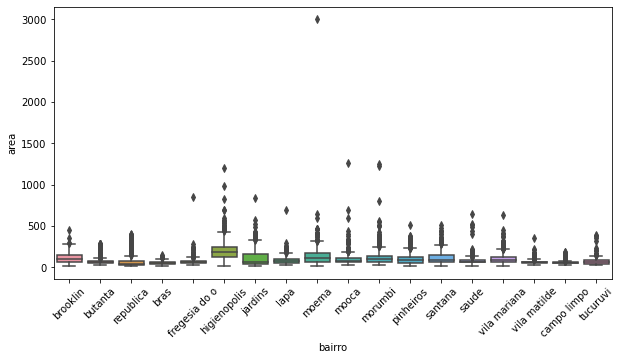

In [133]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df[["bairro", "area"]], y="area", x="bairro")
plt.xticks(rotation=45)

In [134]:
for bairro in df["bairro"].unique():
    df = remove_outliers(df, bairro, "area", max_removidos=.05)

brooklin: remocao por iqr seria 0.487210718635811%
Lower bound: 0, upper bound: 286.5
Removidos por iqr: 0.487210718635811%
butanta: remocao por iqr seria 7.015457788347201%
Lower bound: 24.0, upper bound: 132.0
Removidos por percentis: 4.99405469678954% dos dados
republica: remocao por iqr seria 7.78032036613272%
Lower bound: 13.0, upper bound: 205.24999999999864
Removidos por percentis: 5.034324942791757% dos dados
bras: remocao por iqr seria 5.882352941176472%
Lower bound: 19.0, upper bound: 121.0
Removidos por percentis: 4.382929642445211% dos dados
fregesia do o: remocao por iqr seria 6.349206349206349%
Lower bound: 25.0, upper bound: 127.94999999999993
Removidos por percentis: 5.102040816326525% dos dados
higienopolis: remocao por iqr seria 3.4482758620689613%
Lower bound: 0, upper bound: 432.75
Removidos por iqr: 3.4482758620689613%
jardins: remocao por iqr seria 4.968152866242037%
Lower bound: 0, upper bound: 334.0
Removidos por iqr: 4.968152866242037%
lapa: remocao por iqr ser

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'brooklin'),
  Text(1, 0, 'butanta'),
  Text(2, 0, 'republica'),
  Text(3, 0, 'bras'),
  Text(4, 0, 'fregesia do o'),
  Text(5, 0, 'higienopolis'),
  Text(6, 0, 'jardins'),
  Text(7, 0, 'lapa'),
  Text(8, 0, 'moema'),
  Text(9, 0, 'mooca'),
  Text(10, 0, 'morumbi'),
  Text(11, 0, 'pinheiros'),
  Text(12, 0, 'santana'),
  Text(13, 0, 'saude'),
  Text(14, 0, 'vila mariana'),
  Text(15, 0, 'vila matilde'),
  Text(16, 0, 'campo limpo'),
  Text(17, 0, 'tucuruvi')])

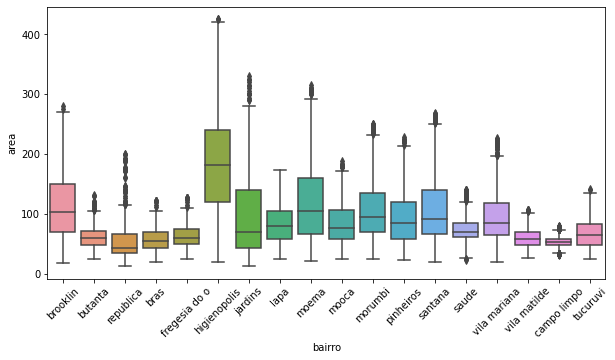

In [135]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df[["bairro", "area"]], y="area", x="bairro")
plt.xticks(rotation=45)


In [136]:
df["rooms"].value_counts(normalize=True)

2     0.398728
3     0.361497
1     0.153448
4     0.082001
5     0.002687
6     0.000524
16    0.000393
20    0.000328
18    0.000131
8     0.000066
17    0.000066
14    0.000066
15    0.000066
Name: rooms, dtype: float64

In [138]:
df["rooms"].max()

20

In [139]:
df.loc[df["rooms"]>6, "rooms"] = np.nan

In [140]:
df["bathrooms"].value_counts(normalize=True)[:8].sum()

0.9990823282642894

In [141]:
df.loc[df["bathrooms"]>8, "bathrooms"] = np.nan

In [142]:
df["garages"].value_counts(normalize=True)[:7]

1    0.483613
2    0.261012
0    0.132341
3    0.075052
4    0.035199
5    0.007669
6    0.002950
Name: garages, dtype: float64

In [143]:
df.loc[df["garages"]>6, "garages"] = np.nan

In [144]:
for bairro in df["bairro"].unique():
    df = remove_outliers(df, bairro, "price", max_removidos=.05)


brooklin: remocao por iqr seria 2.679658952496955%
Lower bound: 0, upper bound: 3425600.0
Removidos por iqr: 2.679658952496955%
butanta: remocao por iqr seria 5.945303210463737%
Lower bound: 147100.0, upper bound: 1030000.0
Removidos por percentis: 4.99405469678954% dos dados
republica: remocao por iqr seria 10.755148741418763%
Lower bound: 99000.0, upper bound: 1500000.0
Removidos por percentis: 4.919908466819223% dos dados
bras: remocao por iqr seria 0.5767012687427964%
Lower bound: 0, upper bound: 920250.0
Removidos por iqr: 0.5767012687427964%
fregesia do o: remocao por iqr seria 6.4625850340136015%
Lower bound: 111111.0, upper bound: 1098479.999999998
Removidos por percentis: 5.102040816326525% dos dados
higienopolis: remocao por iqr seria 8.251231527093594%
Lower bound: 273002.0, upper bound: 6067499.99999999
Removidos por percentis: 5.049261083743839% dos dados
jardins: remocao por iqr seria 8.662420382165603%
Lower bound: 190000.0, upper bound: 6814399.999999999
Removidos por p

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'brooklin'),
  Text(1, 0, 'butanta'),
  Text(2, 0, 'republica'),
  Text(3, 0, 'bras'),
  Text(4, 0, 'fregesia do o'),
  Text(5, 0, 'higienopolis'),
  Text(6, 0, 'jardins'),
  Text(7, 0, 'lapa'),
  Text(8, 0, 'moema'),
  Text(9, 0, 'mooca'),
  Text(10, 0, 'morumbi'),
  Text(11, 0, 'pinheiros'),
  Text(12, 0, 'santana'),
  Text(13, 0, 'saude'),
  Text(14, 0, 'vila mariana'),
  Text(15, 0, 'vila matilde'),
  Text(16, 0, 'campo limpo'),
  Text(17, 0, 'tucuruvi')])

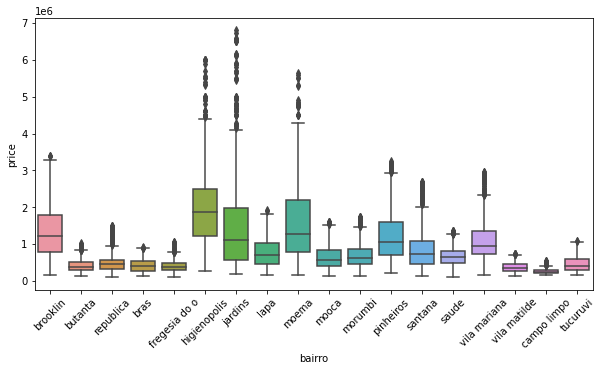

In [145]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df[["bairro", "price"]], y="price", x="bairro")
plt.xticks(rotation=45)

In [146]:
df.loc[df["condo"]<100, "condo"] = np.nan


In [147]:
for bairro in df["bairro"].unique():
    df = remove_outliers(df, bairro, "condo", max_removidos=.05)


brooklin: remocao por iqr seria 3.271692745376953%
Lower bound: 0, upper bound: 2777.0
Removidos por iqr: 3.271692745376953%
butanta: remocao por iqr seria 3.0855539971949564%
Lower bound: 0, upper bound: 1305.0
Removidos por iqr: 3.0855539971949564%
republica: remocao por iqr seria 9.647979139504558%
Lower bound: 100.0, upper bound: 1474.9999999999966
Removidos por percentis: 5.0847457627118615% dos dados
bras: remocao por iqr seria 2.2292993630573243%
Lower bound: 0, upper bound: 890.5
Removidos por iqr: 2.2292993630573243%
fregesia do o: remocao por iqr seria 7.742782152230976%
Lower bound: 100.0, upper bound: 1222.9499999999998
Removidos por percentis: 5.118110236220474% dos dados
higienopolis: remocao por iqr seria 5.289672544080604%
Lower bound: 111.0, upper bound: 6219.0
Removidos por percentis: 4.534005037783373% dos dados
jardins: remocao por iqr seria 6.921944035346095%
Lower bound: 133.0, upper bound: 4908.000000000002
Removidos por percentis: 5.007363770250373% dos dados
la

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'brooklin'),
  Text(1, 0, 'butanta'),
  Text(2, 0, 'republica'),
  Text(3, 0, 'bras'),
  Text(4, 0, 'fregesia do o'),
  Text(5, 0, 'higienopolis'),
  Text(6, 0, 'jardins'),
  Text(7, 0, 'lapa'),
  Text(8, 0, 'moema'),
  Text(9, 0, 'mooca'),
  Text(10, 0, 'morumbi'),
  Text(11, 0, 'pinheiros'),
  Text(12, 0, 'santana'),
  Text(13, 0, 'saude'),
  Text(14, 0, 'vila mariana'),
  Text(15, 0, 'vila matilde'),
  Text(16, 0, 'campo limpo'),
  Text(17, 0, 'tucuruvi')])

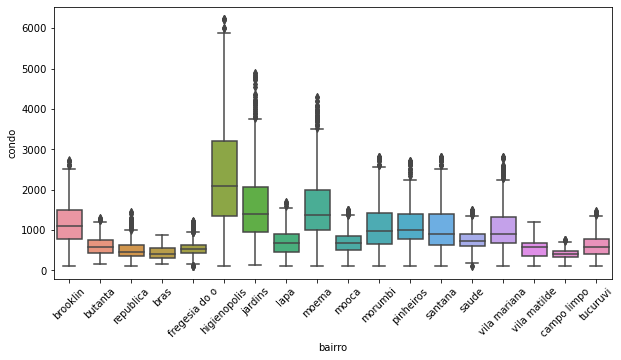

In [148]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df[["bairro", "condo"]], y="condo", x="bairro")
plt.xticks(rotation=45)


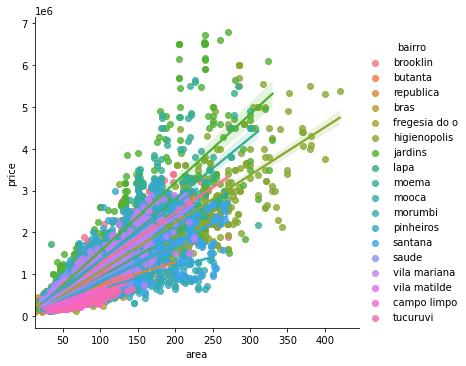

In [149]:
sns.lmplot(data=df, x="area", y="price", hue="bairro")


In [150]:
df.isnull().sum()[:15]

id                            0
url                           0
header                        0
address                       0
area                        615
rooms                        17
bathrooms                    13
garages                      33
price                       628
condo                      2846
bairro                        0
crawled_at                    0
Academia                      0
Aceita animais                0
Acesso para deficientes       0
dtype: int64

In [151]:
df[df.columns[4:10]].corr()

,area,rooms,bathrooms,garages,price,condo
area,1.000000,0.697479,0.767032,0.715472,0.846341,0.843835
rooms,0.697479,1.000000,0.694981,0.652029,0.503955,0.505980
bathrooms,0.767032,0.694981,1.000000,0.740149,0.676715,0.617686
garages,0.715472,0.652029,0.740149,1.000000,0.624047,0.623913
price,0.846341,0.503955,0.676715,0.624047,1.000000,0.804861
condo,0.843835,0.505980,0.617686,0.623913,0.804861,1.000000


In [152]:
len(df.dropna(subset=["area", "rooms", "bathrooms", "garages", "price"]))/len(df)

0.9390403775563713

In [153]:
df.to_csv("intermediate_data.csv", index=False)